# BootstrapODPSample Variability

In [1]:
import chainladder as cl

This example demonstrates how you can drop the outlier link ratios from the
`BootstrapODPSample`.  This has a direct consquence of reducing reserve variability estimates.

In [2]:
# Load triangle
triangle = cl.load_sample('genins')

# Use bootstrap sampler to get resampled triangles
s1 = cl.BootstrapODPSample(
    n_sims=5000, random_state=42).fit(triangle).resampled_triangles_

## Alternatively use fit_transform() to access resampled triangles dropping
#  outlier link-ratios from resampler
s2 = cl.BootstrapODPSample(
    drop_high=[True] * 5+ [False] * 4, 
    drop_low=[True] * 5 + [False] * 4,
    n_sims=5000, random_state=42).fit_transform(triangle)

# Summarize results of first model
results = cl.Chainladder().fit(s1).ibnr_.sum('origin').rename('columns', ['Original'])
# Add another column to triangle with second set of results.
results['Dropped'] = cl.Chainladder().fit(s2).ibnr_.sum('origin')

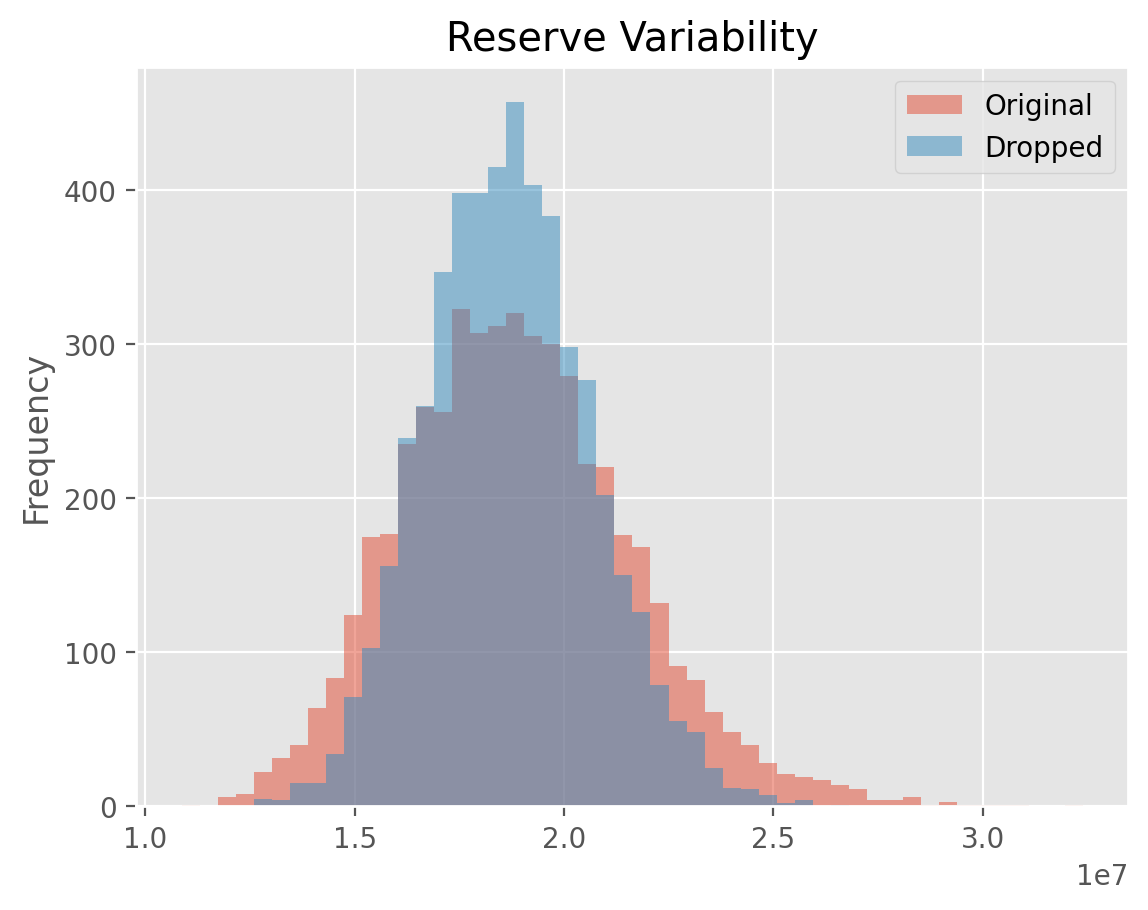

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
# Plot both IBNR distributions
ax = results.to_frame().plot(
    kind='hist', bins=50, alpha=0.5, 
    grid=True, xlabel='Ultimate',
    title='Reserve Variability')